In [88]:
import pandas as pd
import numpy as np

In [89]:
# loading the gzip file
filepath = "Loan_status_2007-2020Q3.gzip"
df = pd.read_csv(filepath, low_memory=False, chunksize=100000)
df = pd.concat(df)

In [90]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [92]:
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 5)].to_list()

In [93]:
df = df[features_to_keep]

In [94]:
columns_to_remove = ['Unnamed: 0', 'id', 'url', 'zip_code', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',  'policy_code', 'initial_list_status', 'pymnt_plan', 'title']
df = df.drop(columns=columns_to_remove)

In [95]:
# describing only the numerical columns
df.select_dtypes(include=np.number).describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,2.925462e+06,...,2.855216e+06,2.855216e+06,2.855061e+06,2.842343e+06,2.924127e+06,2.925387e+06,2.855216e+06,2.875462e+06,2.875462e+06,2.855216e+06
mean,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,5.542130e-01,...,7.687965e-02,2.071412e+00,9.429818e+01,4.007288e+01,1.226790e-01,3.614188e-02,1.832436e+05,5.265770e+04,2.476471e+04,4.543161e+04
std,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,8.599755e-01,...,4.757870e-01,1.841830e+00,8.972040e+00,3.600140e+01,3.531414e-01,3.324517e-01,1.852141e+05,5.182154e+04,2.436650e+04,4.670347e+04
min,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,0.000000e+00,...,0.000000e+00,1.000000e+00,9.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.258600e+04,2.133900e+04,8.900000e+03,1.550000e+04
50%,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,0.000000e+00,...,0.000000e+00,2.000000e+00,1.000000e+02,3.330000e+01,0.000000e+00,0.000000e+00,1.181000e+05,3.883800e+04,1.750000e+04,3.393900e+04
75%,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,1.000000e+00,...,0.000000e+00,3.000000e+00,1.000000e+02,6.670000e+01,0.000000e+00,0.000000e+00,2.647752e+05,6.644900e+04,3.250000e+04,6.101500e+04
max,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,3.300000e+01,...,5.800000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.569000e+06,2.118996e+06


In [96]:
# printing non-numerical columns
df.select_dtypes(exclude=np.number).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'revol_util', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

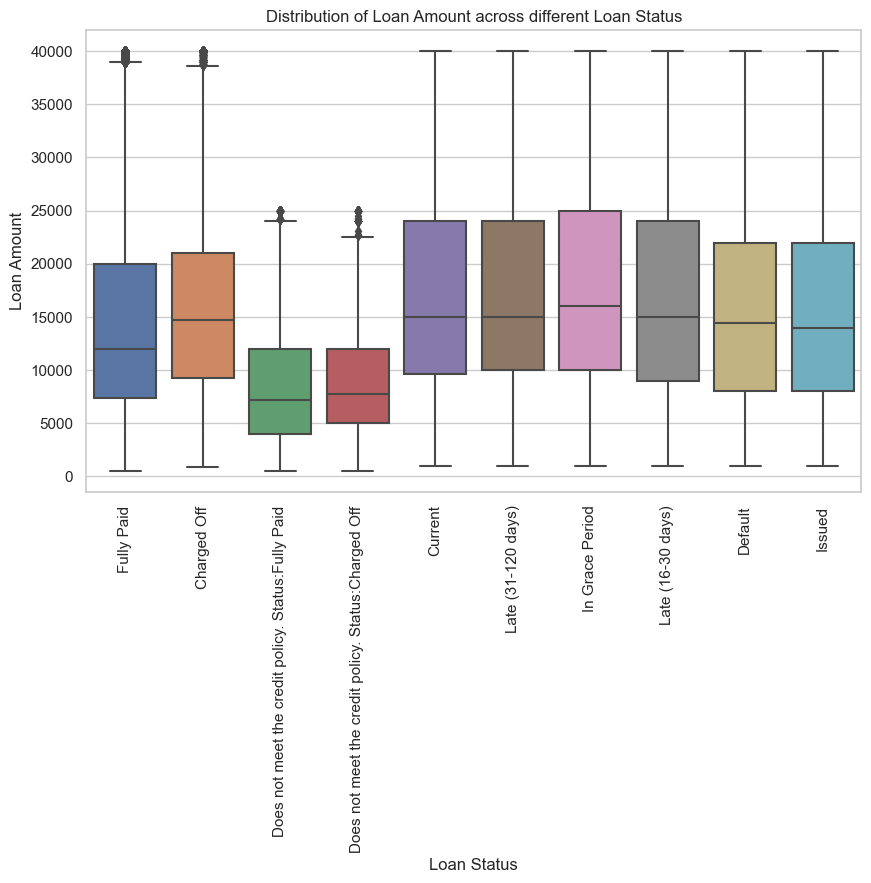

In [97]:
# doing some visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# plotting the distribution of loan amount across different loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount across different Loan Status')
plt.xticks(rotation=90)
plt.show()

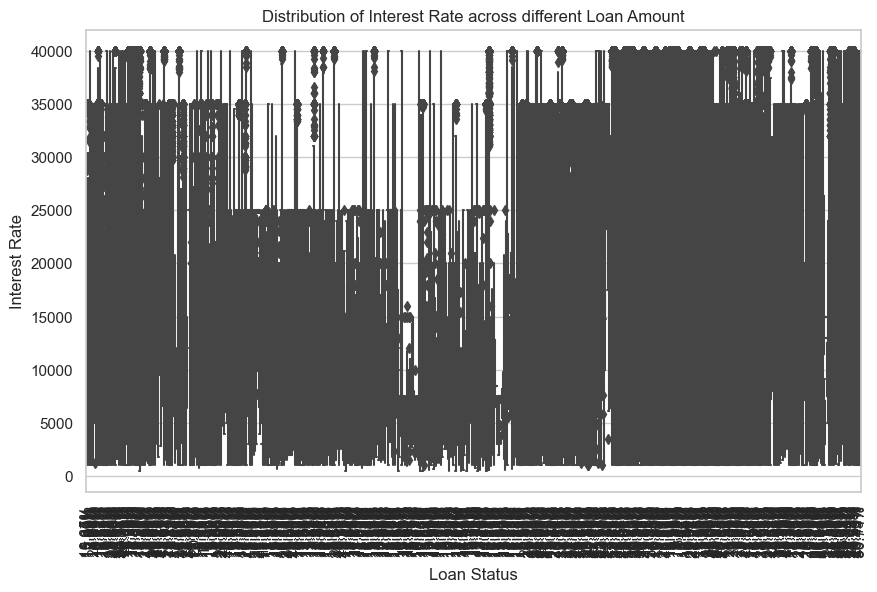

In [98]:
# plotting the distribution of loan amount across different interest rate
plt.figure(figsize=(10,6))
sns.boxplot(x='int_rate', y='loan_amnt', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Distribution of Interest Rate across different Loan Amount')
plt.xticks(rotation=90)
plt.show()

In [99]:
df.int_rate.value_counts()

int_rate
  8.19%    68199
 11.99%    53861
  8.81%    47392
  5.32%    47171
  6.46%    46169
           ...  
 16.90%        1
 11.16%        1
 13.19%        1
 17.72%        1
 17.46%        1
Name: count, Length: 704, dtype: int64

In [100]:
len(df.columns)

76

# Loan Performance Analysis

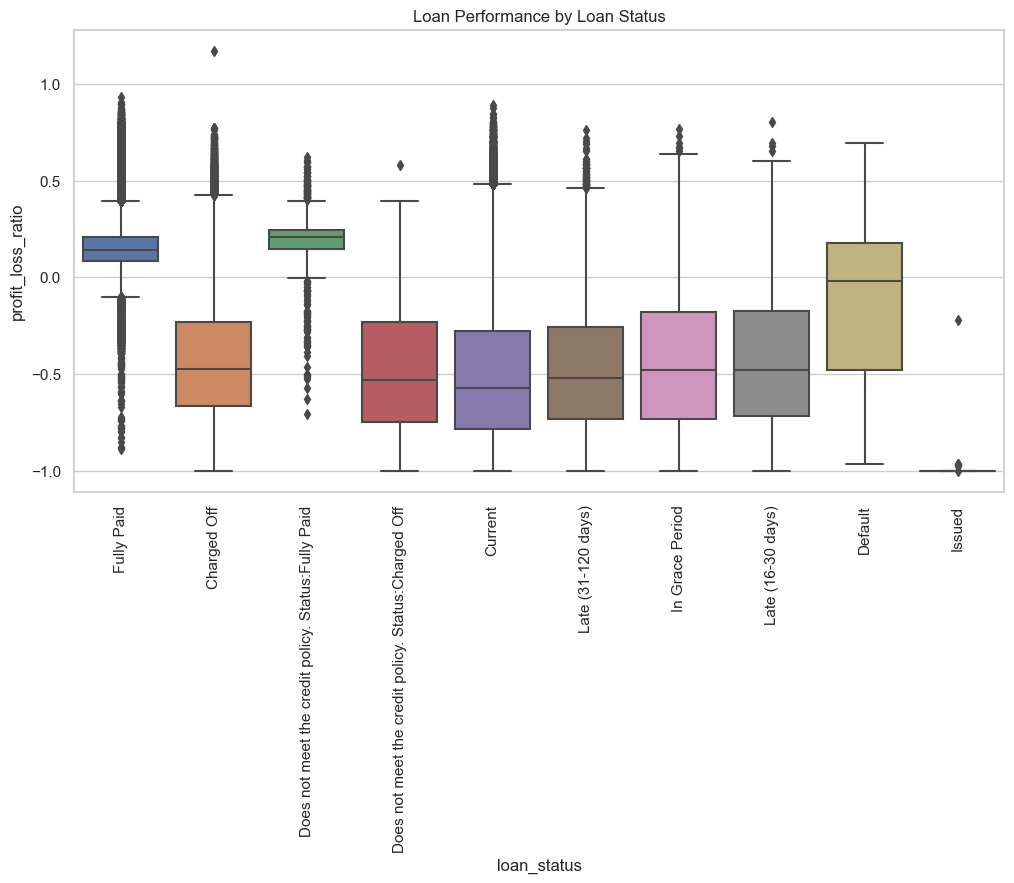

In [101]:
# Calculate loan performance metrics
df['profit_loss'] = df['total_pymnt'] - df['loan_amnt']
df['profit_loss_ratio'] = df['profit_loss'] / df['loan_amnt']

# Visualize loan performance by loan status
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='profit_loss_ratio', data=df)
plt.title('Loan Performance by Loan Status')
plt.xticks(rotation=90)
plt.show()

profit loss ratio is basically comparing the total profits (repaid amount) to the total losses (defaulted or charged-off amount).

# Risk and Return Analysis

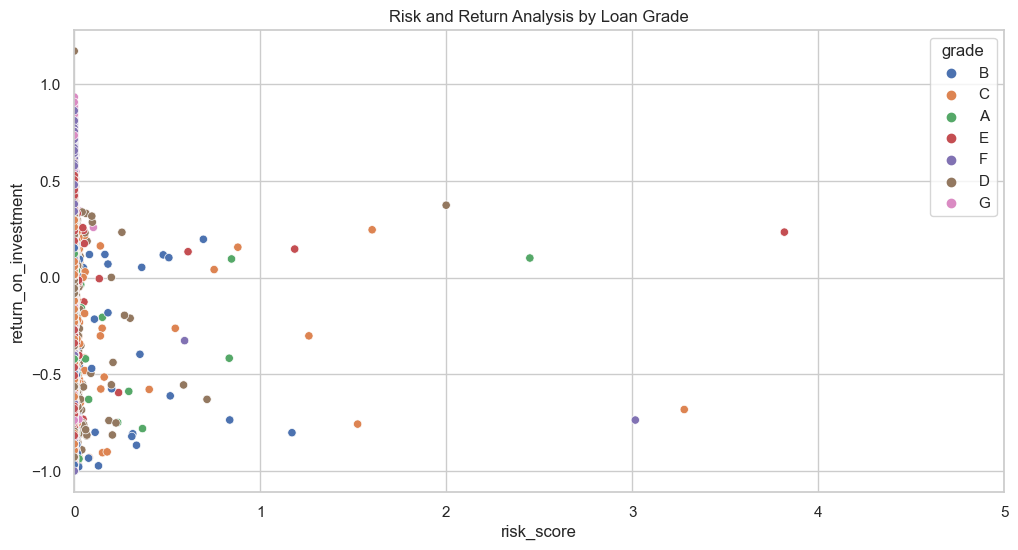

In [102]:
# Calculate risk and return metrics
df['return_on_investment'] = (df['total_pymnt'] / df['loan_amnt']) - 1


# removing the % sign from the interest rate column
df['int_rate'] = df['int_rate'].str.replace('%', '')

df['risk_score'] = pd.to_numeric(df['int_rate']) / df['annual_inc']

# Visualize risk and return by loan grade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='risk_score', y='return_on_investment', hue='grade', data=df)
plt.xlim(0, 5)
plt.title('Risk and Return Analysis by Loan Grade')
plt.show()

# Risk and Return

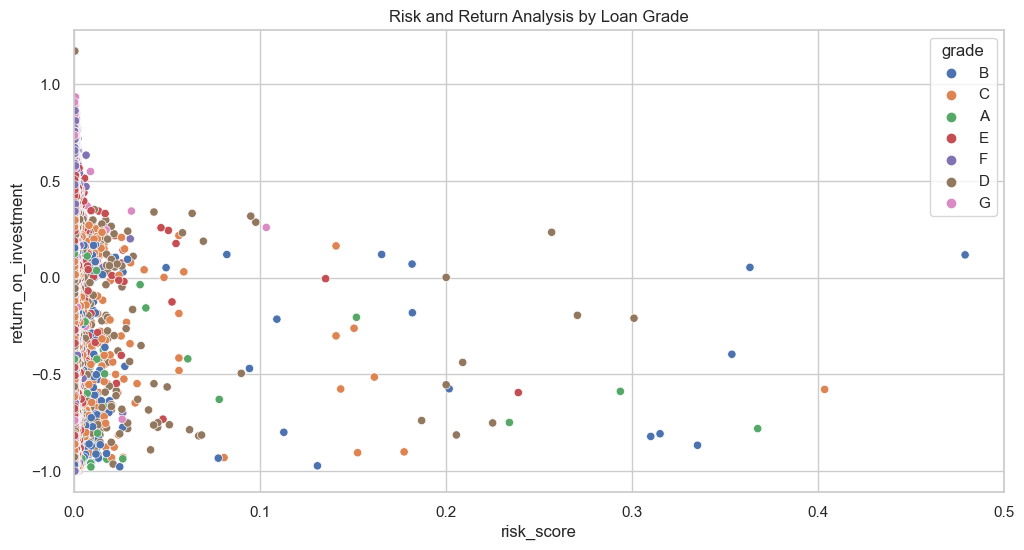

In [103]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='risk_score', y='return_on_investment', hue='grade', data=df)
plt.xlim(0, 0.5)
plt.title('Risk and Return Analysis by Loan Grade')
plt.show()

# Approval Rates by Borrower Characteristics

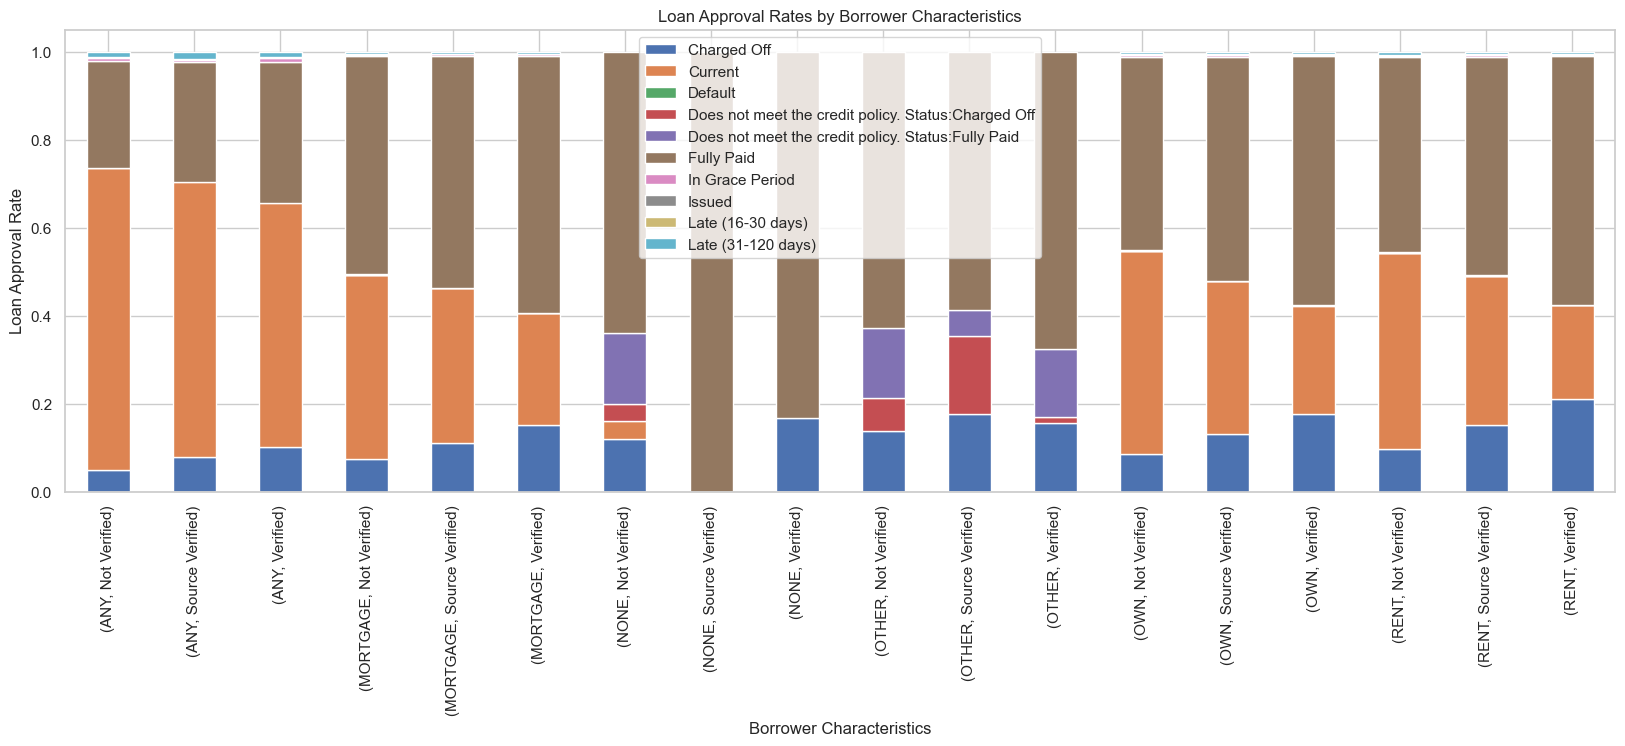

In [104]:
approval_rates = df.groupby(['home_ownership', 'verification_status'])['loan_status'].value_counts(normalize=True).unstack()
approval_rates.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Loan Approval Rates by Borrower Characteristics')
plt.legend(loc='best')
plt.ylabel('Loan Approval Rate')
plt.xlabel('Borrower Characteristics')
plt.show()

# Debt to Income

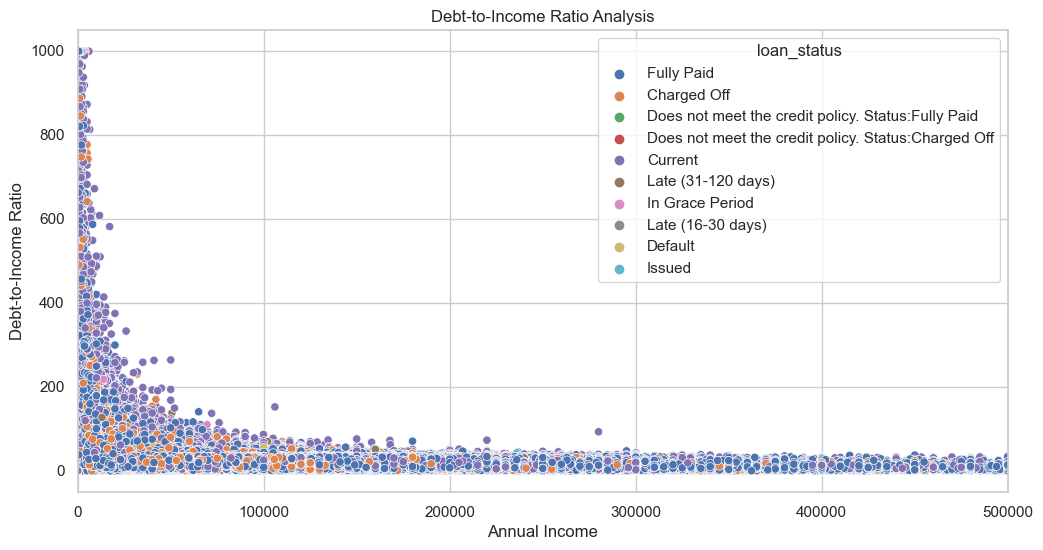

In [105]:
# Analyze the relationship between DTI ratio and income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='annual_inc', y='dti', hue='loan_status', data=df)
plt.title('Debt-to-Income Ratio Analysis')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.xlim(0, 500000)
plt.show()

# Credit Score

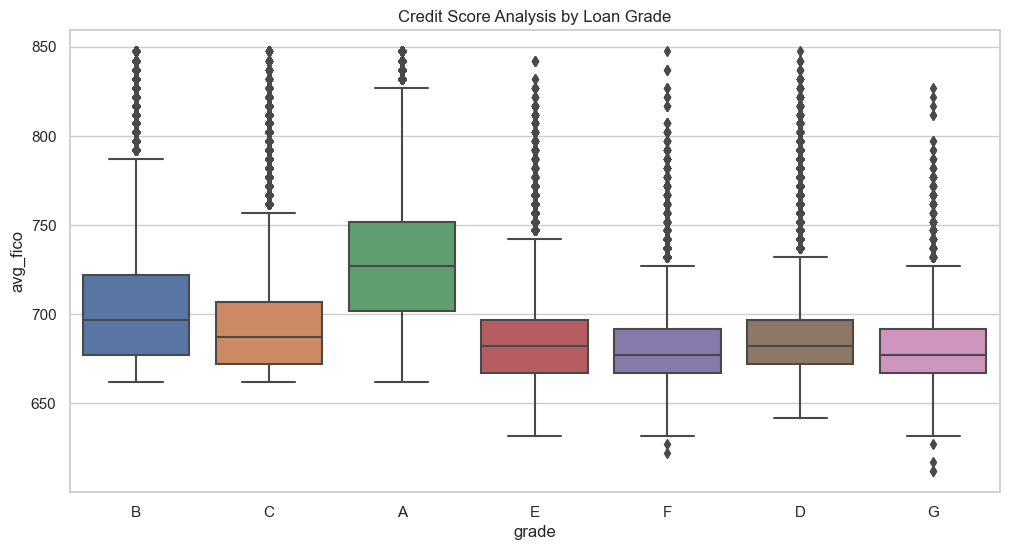

In [106]:
# Analyze credit scores and loan grades
df['avg_fico'] = (df['fico_range_low'] + df['fico_range_high']) / 2
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='avg_fico', data=df)
plt.title('Credit Score Analysis by Loan Grade')
plt.show()

In [107]:
# dropping rows with nan values in the grade column
df = df.dropna(subset=['grade'])

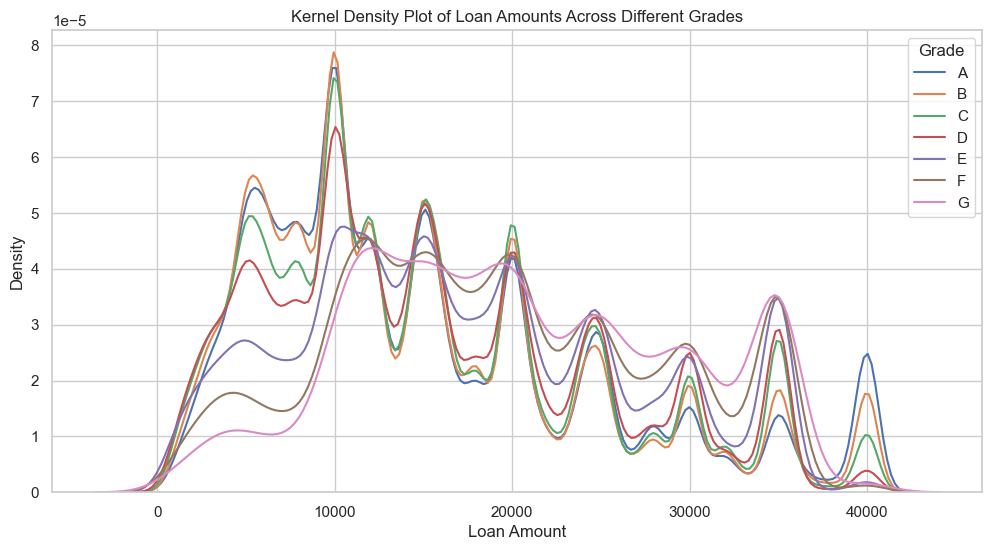

In [108]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'], errors='coerce')

# Ensure 'grade' is a categorical variable for proper sorting
df['grade'] = pd.Categorical(df['grade'], categories=sorted(df['grade'].unique()))

# Set the style for better readability
sns.set(style="whitegrid")

# Plot a kernel density plot for loan amounts by grade
plt.figure(figsize=(12, 6))
for grade in sorted(df['grade'].unique()):
    sns.kdeplot(df[df['grade'] == grade]['loan_amnt'], label=grade)

plt.title('Kernel Density Plot of Loan Amounts Across Different Grades')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title='Grade')
plt.show()

c:\Users\Alli Ajagbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


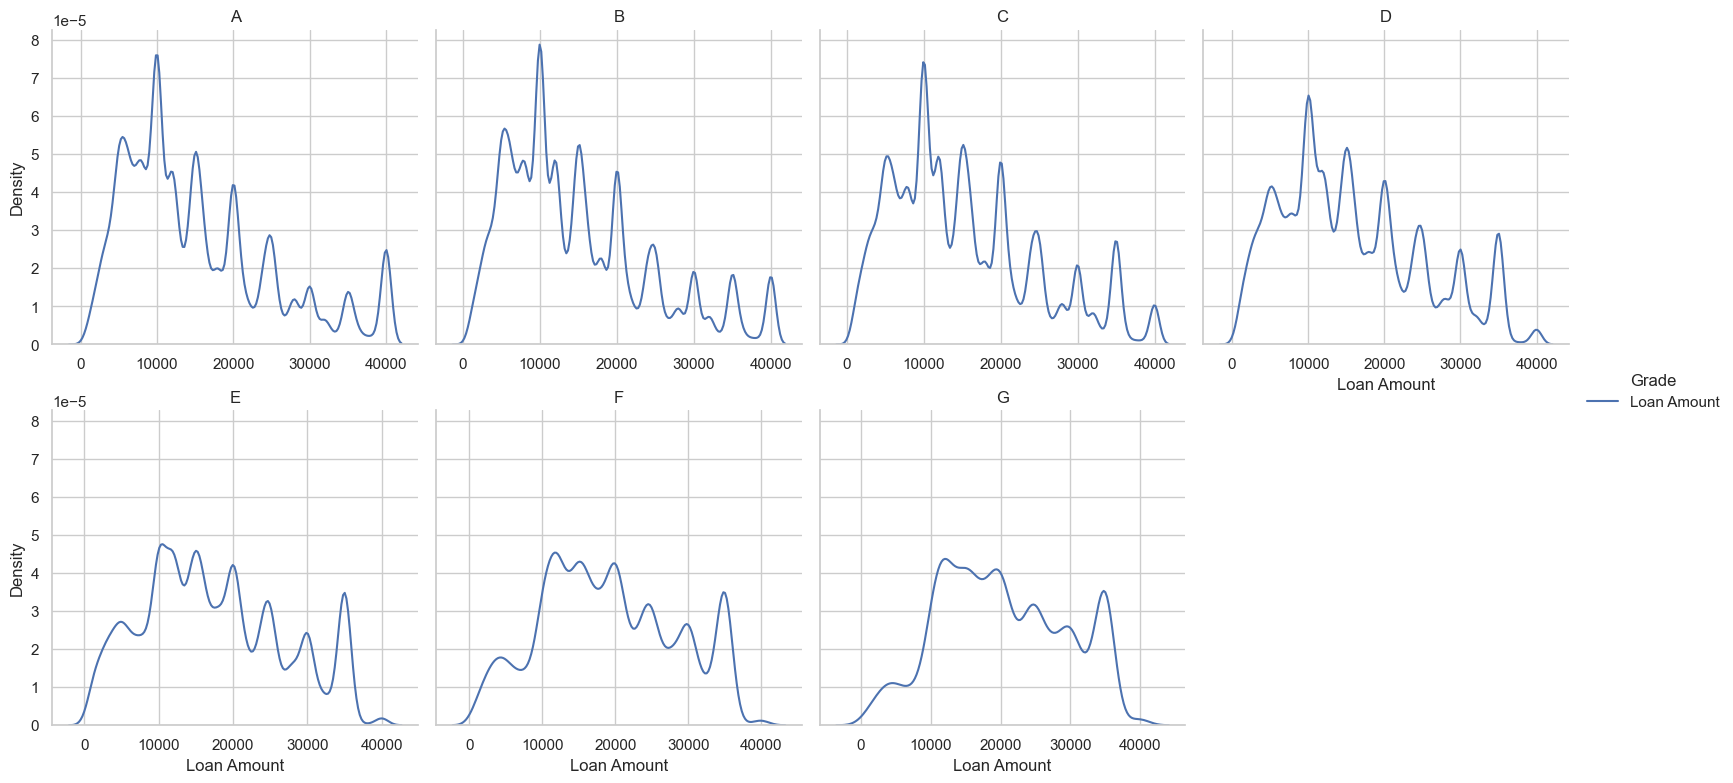

In [109]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'], errors='coerce')

# Ensure 'grade' is a categorical variable for proper sorting
df['grade'] = pd.Categorical(df['grade'], categories=sorted(df['grade'].unique()))

# Set the style for better readability
sns.set(style="whitegrid")

# Create a FacetGrid for subplots
g = sns.FacetGrid(df, col="grade", col_wrap=4, height=4, sharex=False)

# Map kernel density plots to the FacetGrid
g.map(sns.kdeplot, 'loan_amnt', label='Loan Amount')

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Loan Amount', 'Density')


g.add_legend(title='Grade')
plt.show()

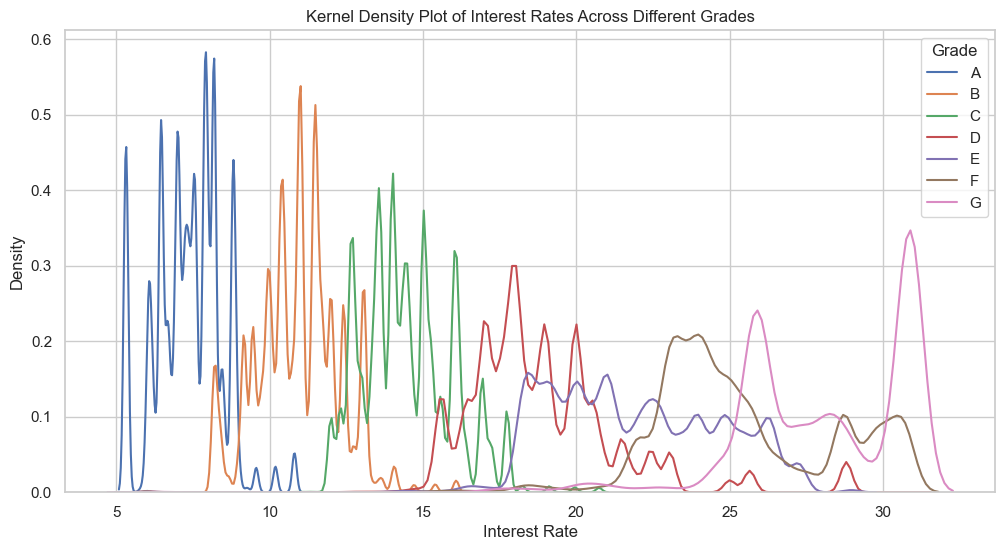

In [110]:
df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')

# Ensure 'grade' is a categorical variable for proper sorting
df['grade'] = pd.Categorical(df['grade'], categories=sorted(df['grade'].unique()))

# Set the style for better readability
sns.set(style="whitegrid")

# Plot a kernel density plot for interest rates by grade
plt.figure(figsize=(12, 6))
for grade in sorted(df['grade'].unique()):
    sns.kdeplot(df[df['grade'] == grade]['int_rate'], label=grade)

plt.title('Kernel Density Plot of Interest Rates Across Different Grades')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.legend(title='Grade')
plt.show()

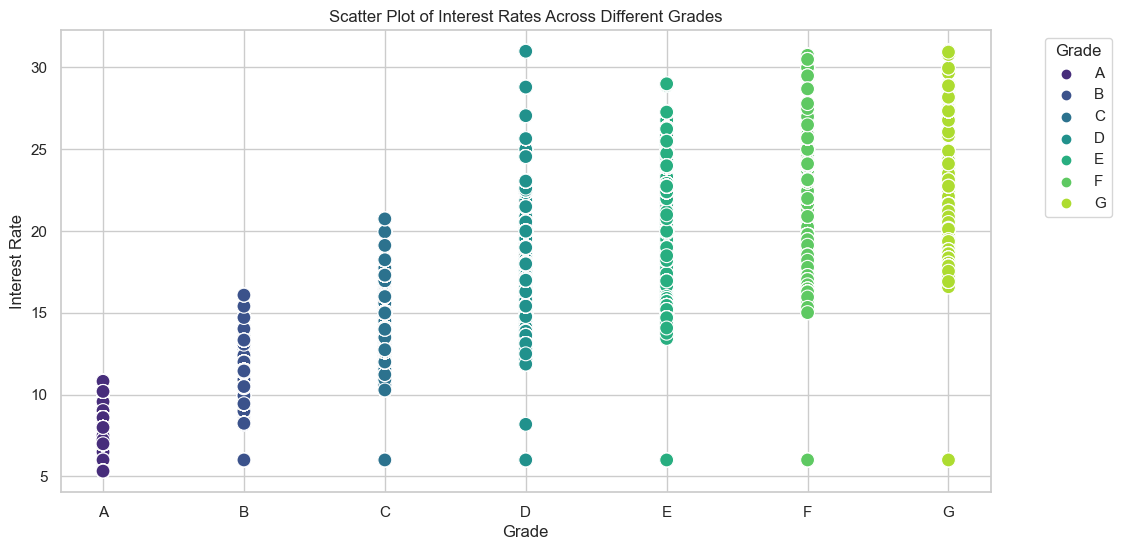

In [111]:
if df['int_rate'].dtype != 'float64':
    # Convert 'int_rate' to numeric
    df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')

# Ensure 'grade' is a categorical variable for proper sorting
df['grade'] = pd.Categorical(df['grade'], categories=sorted(df['grade'].unique()))

# Set the style for better readability
sns.set(style="whitegrid")

# Plot a scatter plot for interest rates by grade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='grade', y='int_rate', data=df, hue='grade', palette='viridis', s=100)

plt.title('Scatter Plot of Interest Rates Across Different Grades')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [112]:
len(df)

2925492

In [113]:
random_sample = df.sample(n=100000, random_state=42)
random_sample.to_csv('for_rushi.csv', index=False)

assumptions: borrowers are independent of each other.

In [114]:
import pandas as pd
from scipy.optimize import minimize

def diversification_model(investor_amount, borrower_dict):
    df = pd.DataFrame(list(borrower_dict.values()), columns=['grade', 'term', 'loan_amnt', 'int_rate'])

    # Convert interest rate to numeric
    if df['int_rate'].dtype != 'float64':
        # Convert 'int_rate' to numeric
        df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')
        
    #df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')

    # Map grade to a numerical value (you may adjust the mapping based on the specific grading system)
    grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
    df['grade_numeric'] = df['grade'].map(grade_mapping)

    # Map term to a numerical value (shorter term is considered less risky)
    term_mapping = {'36 months': 1, '60 months': 2}
    df['term_numeric'] = df['term'].map(term_mapping)

    def objective(weights, df):
        weighted_return = (weights * df['int_rate']).sum()
        return -weighted_return

    def constraint(weights, investor_amount, df):
        return investor_amount - (weights * df['loan_amnt']).sum()

    # Define initial weights
    initial_weights = [1.0 / len(df)] * len(df)

    # Define bounds for each weight
    bounds = [(0, 1)] * len(df)

    # Set up optimization problem
    constraints = [{'type': 'eq', 'fun': constraint, 'args': (investor_amount, df)}]

    # Additional constraint: sum of weights for each grade should be less than or equal to 1
    grade_constraints = [{'type': 'ineq', 'fun': lambda weights, df=df, grade=grade: 1 - (weights[df['grade_numeric'] == grade].sum())}
                         for grade in grade_mapping.values()]

    # Additional constraint: total weight for each term should be less than or equal to 1
    term_constraints = [{'type': 'ineq', 'fun': lambda weights, df=df, term=term: 1 - (weights[df['term_numeric'] == term].sum())}
                         for term in term_mapping.values()]
    
    result = minimize(objective, initial_weights, args=(df,), method='SLSQP', bounds=bounds, constraints=constraints+grade_constraints+term_constraints)

    # Extract optimized weights
    optimized_weights = result.x

    # Calculate the proportions to be given to each borrower
    proportions = optimized_weights / optimized_weights.sum()

    # Calculate the expected return for the investor
    expected_return = -result.fun

    return proportions, expected_return 

In [115]:
investor_amount = 3000

borrower_dict = df[['grade', 'term', 'loan_amnt', 'int_rate']].sample(n=20).to_dict(orient='index')

proportions, expected_return = diversification_model(investor_amount, borrower_dict)

print("Proportions to be given to each borrower:")
print(proportions)
print("\nExpected Return for the Investor:")
print(expected_return)

Proportions to be given to each borrower:
[0.00000000e+00 0.00000000e+00 9.85191095e-13 0.00000000e+00
 5.40658490e-12 0.00000000e+00 1.00000000e+00 0.00000000e+00
 4.63837302e-13 9.24352955e-12 0.00000000e+00 0.00000000e+00
 2.69619049e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Expected Return for the Investor:
13.660000000126411


In [116]:
import pandas as pd
from scipy.optimize import minimize

def diversification_model(investor_amount, borrower_dict, risk_free_rate):
    df = pd.DataFrame(list(borrower_dict.values()), columns=['grade', 'term', 'loan_amnt', 'int_rate'])

    # Convert interest rate to numeric
    if df['int_rate'].dtype != 'float64':
        # Convert 'int_rate' to numeric
        df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')

    # Map grade to a numerical value (you may adjust the mapping based on the specific grading system)
    grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
    df['grade_numeric'] = df['grade'].map(grade_mapping)

    # Map term to a numerical value (shorter term is considered less risky)
    term_mapping = {'36 months': 1, '60 months': 2}
    df['term_numeric'] = df['term'].map(term_mapping)

    def objective(weights, df, risk_free_rate):
        portfolio_return = (weights * df['int_rate']).sum()
        portfolio_volatility = (weights * df['int_rate']).std()
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio  # Negate to maximize

    def constraint(weights, investor_amount, df):
        return investor_amount - (weights * df['loan_amnt']).sum()

    # Define initial weights
    initial_weights = [1.0 / len(df)] * len(df)

    # Define bounds for each weight
    bounds = [(0, 1)] * len(df)

    # Set up optimization problem
    constraints = [{'type': 'eq', 'fun': constraint, 'args': (investor_amount, df)}]

    # Additional constraint: sum of weights for each grade should be less than or equal to 1
    grade_constraints = [{'type': 'ineq', 'fun': lambda weights, df=df, grade=grade: 1 - (weights[df['grade_numeric'] == grade].sum())}
                         for grade in grade_mapping.values()]

    # Additional constraint: total weight for each term should be less than or equal to 1
    term_constraints = [{'type': 'ineq', 'fun': lambda weights, df=df, term=term: 1 - (weights[df['term_numeric'] == term].sum())}
                         for term in term_mapping.values()]

    result = minimize(objective, initial_weights, args=(df, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints+grade_constraints+term_constraints)

    # Extract optimized weights
    optimized_weights = result.x

    # Calculate the proportions to be given to each borrower
    proportions = optimized_weights / optimized_weights.sum()

    # Calculate the expected return for the investor
    expected_return = (optimized_weights * df['int_rate']).sum()

    return proportions, expected_return

In [117]:
investor_amount = 30000
borrower_dict = df[['grade', 'term', 'loan_amnt', 'int_rate']].sample(n=50).to_dict(orient='index')

# Risk-free rate (you may adjust this based on your specific scenario)
risk_free_rate = 0.06

# Call the diversification_model function
proportions, expected_return = diversification_model(investor_amount, borrower_dict, risk_free_rate)

# Print the results
print("Proportions to be given to each borrower:")
print(proportions)
print("\nExpected Return for the Investor:")
print(expected_return)

Proportions to be given to each borrower:
[0.0183144  0.03659339 0.01166882 0.01246292 0.04490658 0.01246598
 0.02576282 0.02229266 0.02265919 0.02508489 0.0263371  0.01233693
 0.02055009 0.0143491  0.01878579 0.01051855 0.02035622 0.01677215
 0.01769745 0.01763428 0.00913809 0.02031385 0.03048302 0.01662809
 0.03155314 0.01508131 0.0219837  0.01623175 0.01184766 0.01977588
 0.02789069 0.02848182 0.01433294 0.02689624 0.01598799 0.01683983
 0.02777767 0.03021707 0.01099903 0.01155041 0.02097592 0.02115425
 0.01670589 0.01552501 0.01428751 0.01579672 0.03660039 0.0122725
 0.01821525 0.01690707]

Expected Return for the Investor:
23.255828133832622


In [119]:
import streamlit as st
import plotly.express as px

# Display the results using Streamlit
st.title("Diversification Model Results")

# Display Proportions
st.subheader("Proportions to be given to each borrower:")
st.write(proportions)

# Display Expected Return
st.subheader("Expected Return for the Investor:")
st.write(expected_return)

# Visualize Proportions with Plotly
df_proportions = pd.DataFrame(proportions, columns=['Proportions'])
fig_proportions = px.pie(df_proportions, values='Proportions', names=df_proportions.index, title='Proportions of Investment')
st.plotly_chart(fig_proportions)

# Visualize Expected Return with Plotly
df_return = pd.DataFrame({'Expected Return': [expected_return]})
fig_return = px.bar(df_return, y='Expected Return', title='Expected Return for the Investor')
st.plotly_chart(fig_return)

DeltaGenerator()

In [1]:
import pandas as pd

In [2]:
prachi = pd.read_csv('beautiful_dataset.csv')

In [3]:
prachi.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,deviation,shape_ratio
0,12000.0,60,19.69,315.87,E,E5,MORTGAGE,63996.0,Not Verified,0,...,22226.0,99.2,38.0,f,INDIVIDUAL,1.0,0.0,"PSC 9497, Box 6404\r\nAPO AA 22690",0.742977,0.513183
1,11500.0,60,17.86,291.15,D,D5,RENT,53500.0,Verified,1,...,11563.0,31.9,34.0,w,INDIVIDUAL,0.0,0.0,"595 Shawn Points Apt. 842\r\nEast Bethanytown,...",0.647037,0.321847
2,24000.0,60,24.99,704.30,F,F4,MORTGAGE,79900.8,Verified,1,...,8665.0,89.3,50.0,f,INDIVIDUAL,1.0,0.0,6385 Calderon Passage Apt. 343\r\nLake Lisaber...,0.427038,0.322709
3,24000.0,60,23.28,680.44,F,F2,MORTGAGE,85000.0,Verified,1,...,4168.0,90.6,35.0,f,INDIVIDUAL,1.0,0.0,"9431 Julia Via Apt. 451\r\nLake Dannyview, NH ...",0.999993,24269.110731
4,16000.0,36,15.31,557.08,C,C2,RENT,40000.0,Verified,1,...,22525.0,54.9,37.0,w,INDIVIDUAL,0.0,0.0,"76215 Christopher Stravenue\r\nClarkberg, NV 0...",0.991986,10.993802
